import library

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Define DATA FILES

In [8]:
!unzip '/content/drive/MyDrive/conversation engine for deaf and dumb.zip'

Streaming output truncated to the last 5000 lines.
 extracting: Dataset/training_set/G/1225.png  
 extracting: Dataset/training_set/G/1226.png  
 extracting: Dataset/training_set/G/1227.png  
 extracting: Dataset/training_set/G/1228.png  
 extracting: Dataset/training_set/G/1229.png  
  inflating: Dataset/training_set/G/123.png  
 extracting: Dataset/training_set/G/1230.png  
 extracting: Dataset/training_set/G/1231.png  
 extracting: Dataset/training_set/G/1232.png  
  inflating: Dataset/training_set/G/1233.png  
  inflating: Dataset/training_set/G/1234.png  
  inflating: Dataset/training_set/G/1235.png  
  inflating: Dataset/training_set/G/1236.png  
  inflating: Dataset/training_set/G/1237.png  
  inflating: Dataset/training_set/G/1238.png  
  inflating: Dataset/training_set/G/1239.png  
  inflating: Dataset/training_set/G/124.png  
  inflating: Dataset/training_set/G/1240.png  
  inflating: Dataset/training_set/G/1241.png  
  inflating: Dataset/training_set/G/1242.png  
  inflating

SAMPLE IMAGES FROM DATASET



In [12]:
train_data_path = 'train_dataset/'
test_data_path = 'test_dataset/'

In [13]:
def display(img,sign=None):
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.title(sign)
    ax.imshow(img)

Training Data Set

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [18]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:

model.save('Real_time.h5')

In [25]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
x_train = train_datagen.flow_from_directory("/content/Dataset/training_set", target_size=(64,64),batch_size=100,
                                            class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


In [27]:
x_test = test_datagen.flow_from_directory("/content/Dataset/test_set", target_size=(64,64),batch_size=100,
                                         class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


In [28]:
len(x_train)

158

In [29]:
len(x_test)

23

In [31]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.8932 - accuracy: 0.6857

30/30 [==============================] - 12s 382ms/step - loss: 0.8932 - accuracy: 0.6857 - val_loss: 0.3773 - val_accuracy: 0.8969
Epoch 2/10
30/30 [==============================] - 8s 257ms/step - loss: 0.2535 - accuracy: 0.9217
Epoch 3/10
30/30 [==============================] - 8s 266ms/step - loss: 0.1418 - accuracy: 0.9597
Epoch 4/10
30/30 [==============================] - 7s 244ms/step - loss: 0.0848 - accuracy: 0.9770
Epoch 5/10
30/30 [==============================] - 7s 243ms/step - loss: 0.0770 - accuracy: 0.9770
Epoch 6/10
30/30 [==============================] - 7s 243ms/step - loss: 0.0508 - accuracy: 0.9863
Epoch 7/10
30/30 [==============================] - 9s 303ms/step - loss: 0.0504 - accuracy: 0.9860
Epoch 8/10
30/30 [==============================] - 7s 248ms/step - loss: 0.0356 - accuracy: 0.9903
Epoch 9/10
30/30 [==============================] - 7s 241ms/step - loss: 0.0260 - accuracy: 0.9932
Epoch 10/10
30/30 [==============================] - 7s 243ms/step -

In [34]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [37]:
model.save('Real_time.h5')

In [39]:
model.save("aslpng.h5")

In [41]:

model=Sequential()

In [42]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [43]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(200,activation='relu'))
model.add(Dense(9,activation="softmax"))

In [46]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [49]:
model = load_model('/content/Real_time.h5')

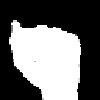

In [50]:
img = image.load_img('/content/Dataset/test_set/A/107.png',target_size = (100,100))
img

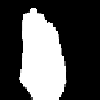

In [53]:
img = image.load_img('/content/Dataset/test_set/B/107.png',target_size = (100,100))
img

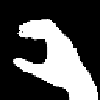

In [56]:
img = image.load_img('/content/Dataset/test_set/C/107.png',target_size = (100,100))
img

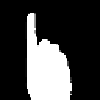

In [55]:
img = image.load_img('/content/Dataset/test_set/D/107.png',target_size = (100,100))
img

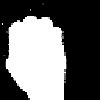

In [57]:
img = image.load_img('/content/Dataset/test_set/E/107.png',target_size = (100,100))
img

Test set

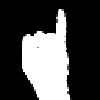

In [58]:
img = image.load_img('/content/Dataset/test_set/I/107.png',target_size = (100,100))
img

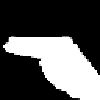

In [59]:
img = image.load_img('/content/Dataset/test_set/H/107.png',target_size = (100,100))
img

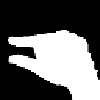

In [60]:
img = image.load_img('/content/Dataset/test_set/G/107.png',target_size = (100,100))
img

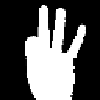

In [61]:
img = image.load_img('/content/Dataset/test_set/F/107.png',target_size = (100,100))
img

Image Data Generator



In [62]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rescale=1/255,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.25)

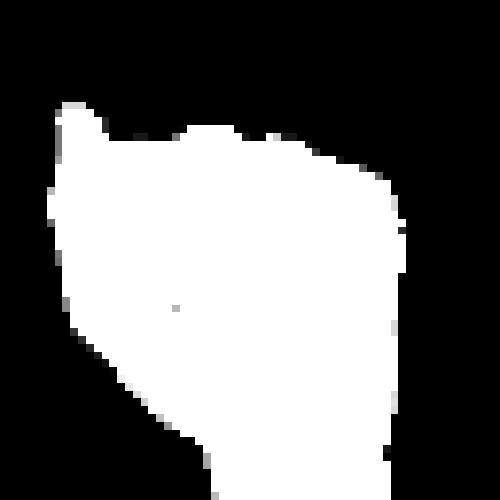

In [65]:
img = image.load_img('/content/Dataset/test_set/A/107.png',target_size = (500,500))
img

Original Image

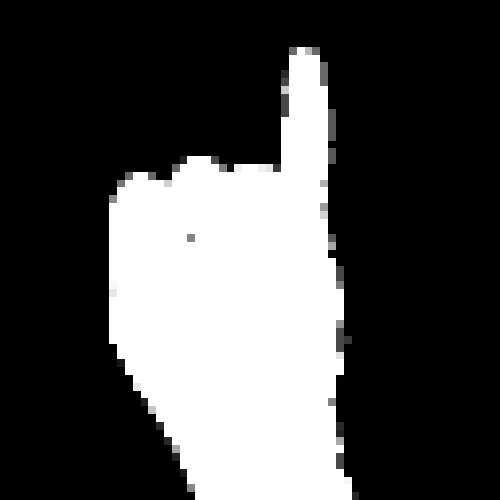

In [66]:
img = image.load_img('/content/Dataset/test_set/I/107.png',target_size = (500,500))
img

Train Data Generator

In [72]:
x = image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [73]:
x.shape

(500, 500, 3)

In [74]:
x = np.expand_dims(x,axis=0)
x.shape


(1, 500, 500, 3)

In [75]:
pred = model.predict(x_test)

23/23 [==============================] - 2s 99ms/step


In [76]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred.argmax(axis=1)[0]
pred_id

2

In [77]:
print("the alphabet is ",str(class_name[pred_id]))


the alphabet is  C


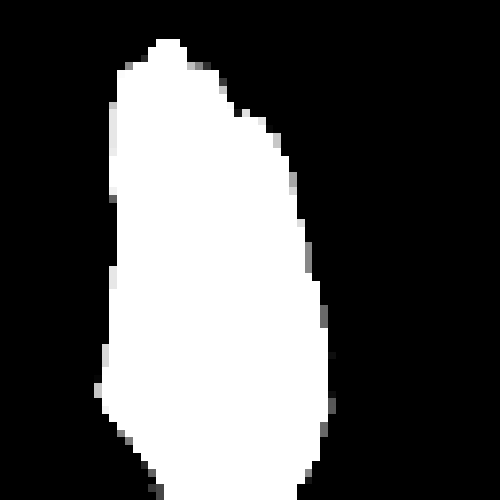

In [78]:
img = image.load_img('/content/Dataset/test_set/B/107.png',target_size = (500,500))
img

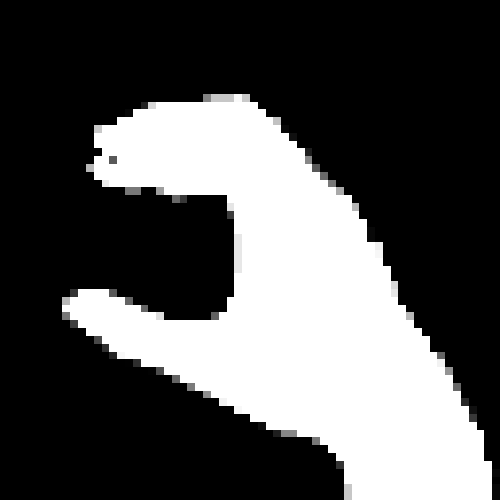

In [79]:
img = image.load_img('/content/Dataset/test_set/C/107.png',target_size = (500,500))
img